# Análisis exploratorio de datos

# Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import os
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creando ruta absoluta de la carpeta del proyecto
root_path = Path(os.getcwd()).resolve().parent
sys.path.append(str(root_path))

In [3]:
# Importación de funciones auxiliares del script AutoImporter
from src.utils.auto_importer import BoxplotVisualizer

In [4]:
# Cargando los datos del archivo procesado anteriormente
df = pd.read_csv("../data/processed/heart_disease_dataset_new.csv")

In [5]:
# Creando la copia del conjunto de datos para trabajar sobre la copia y mantener los datos originales intactos para futuras consultas si es necesario

data = df.copy()

-----------------------------------

# Descripción de los datos

|Feature|Descripción |tipo de dato |clasificación de dato |
|---|--- |---- |--- |
|``Edad``|  Edad del paciente |int | cuantitativo continuo |
|``Sexo``| Sexo del paciente [M: Masculino, F: Femenino] |obj | cualitativo nominal |
|``TipoDolorTorax``| Tipo de dolor de pecho [TA: Angina Típica, ATA: Angina Atípica, NAP: Dolor No Anginoso, ASY: Asintomático] |obj |cualitativo nominal |
|``PresionArterialReposo``| Presión arterial en reposo [mm Hg]|int |cuantitativo continuo |
|``Colesterol``| Colesterol sérico [mm/dl]|float | cuantitativo nominal |
|``GlucosaEnAyunas``| Glucosa en sangre en ayunas [1: si GlucosaAyunas > 120 mg/dl, 0: en caso contrario] |int |cualitativo binario |
|``ECGReposo``| Resultados del electrocardiograma en reposo |obj | cualitativo nominal |
|``FreqCardiacaMaxima``| Frecuencia cardíaca máxima alcanzada |int |cuantitativo continuo |
|``AnginaDeEsfuerzo``| Angina inducida por el ejercicio [Y: Sí, N: No] |obj | cualitativo binario |
|``DescensoST``| ST [Valor numérico medido en depresión] |float | cuantitativo continuo |
|``PendienteST``| La pendiente del segmento ST máximo durante el ejercicio [Up: pendiente ascendente, Flat: plano, Down: pendiente descendente] |obj | cualitativo ordinal |
|``EnfermedadCardiaca``| Clase de salida [1: enfermedad cardíaca, 0: Normal] |int | cualitativo binario |

# Análisis univariado

In [6]:
# Instanciando la función responsable de la generación de gráficos
boxplots = BoxplotVisualizer(data)

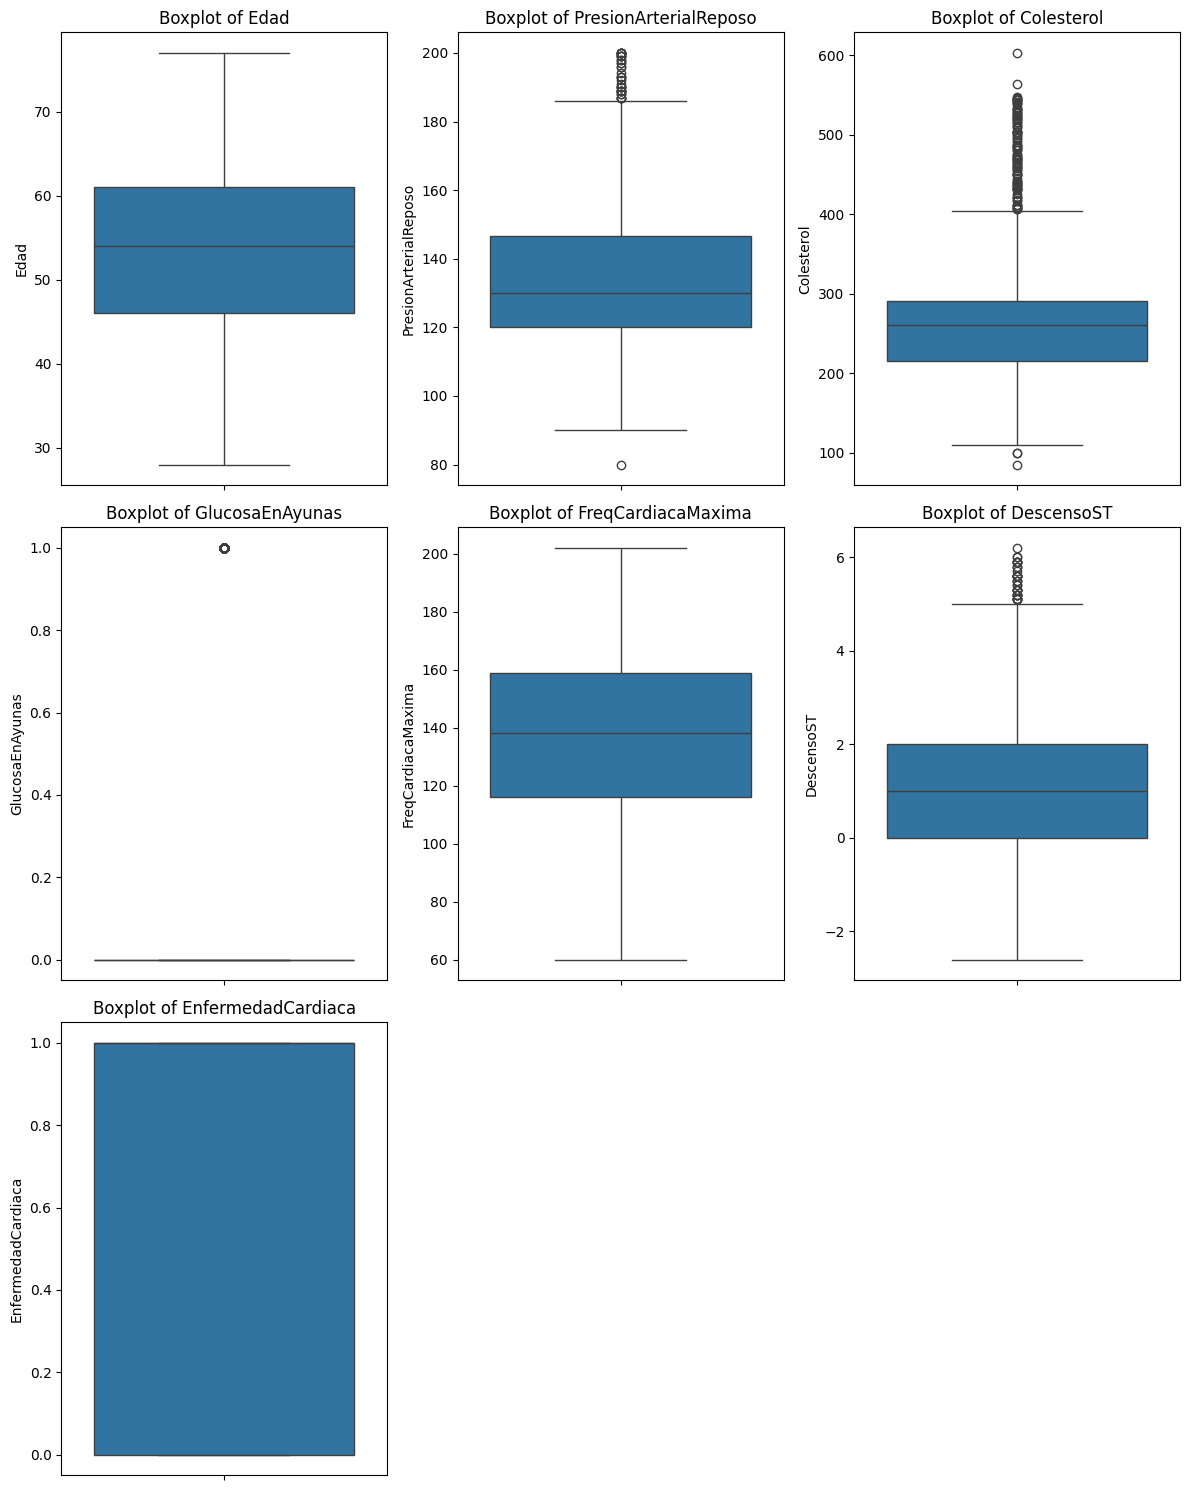

In [7]:
boxplots.generate_boxplots()

A pesar de la presencia de outliers notables, especialmente en colesterol, presión arterial y descenso ST, se ha decidido mantener todos los datos en el análisis. Esta decisión es metodológicamente importante ya que estos valores atípicos pueden representar casos clínicos reales y significativos que no deben ser descartados, pues podrían aportar información valiosa sobre perfiles de riesgo cardiovascular extremos pero reales en la población.

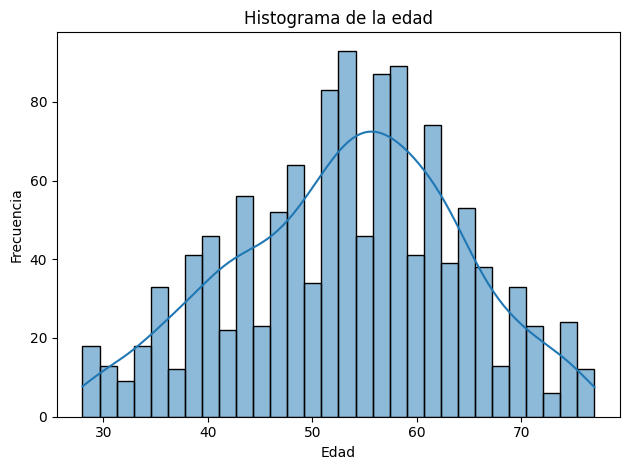

In [8]:
sns.histplot(data, x='Edad', kde=True, bins=30)
plt.ylabel('Frecuencia')
plt.title("Histograma de la edad");
plt.tight_layout()
plt.show()

El histograma muestra la distribución de edades en el conjunto de datos, con una forma aproximadamente normal y concentración mayoritaria entre 50-60 años. El pico se encuentra cerca de los 55 años, con más de 90 individuos en ese rango. La edad de los participantes va desde aproximadamente 28 hasta 77 años, con una distribución relativamente simétrica.

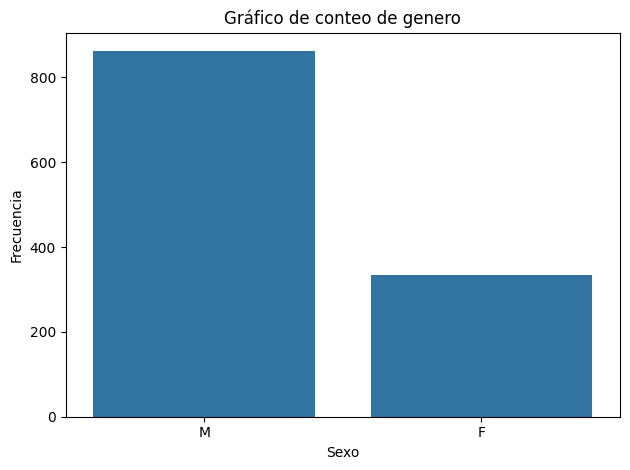

In [9]:
sns.countplot(data, x='Sexo')
plt.ylabel('Frecuencia')
plt.title("Gráfico de conteo de genero");
plt.tight_layout()
plt.show()

El gráfico de conteo de género ilustra la distribución por sexo en el conjunto de datos analizado. Se evidencia una predominancia del género masculino (M) con aproximadamente 850 individuos, en comparación con el género femenino (F) que registra alrededor de 330 participantes.

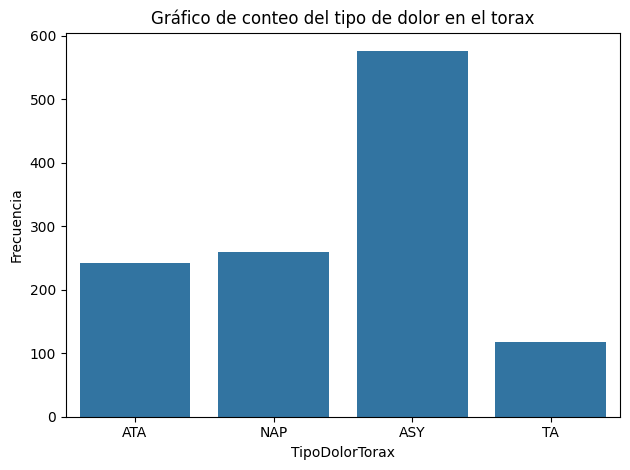

In [10]:
sns.countplot(data, x='TipoDolorTorax');
plt.ylabel('Frecuencia')
plt.title("Gráfico de conteo del tipo de dolor en el torax");
plt.tight_layout()
plt.show()

El gráfico de conteo del tipo de dolor en el tórax presenta la distribución de las diferentes categorías registradas. Se observa que la categoría ASY (asintomático) es predominante, seguida por NAP (dolor no anginoso) y ATA (angina típica) con unos 240 casos. La categoría TA (angina atípica) muestra la menor frecuencia.

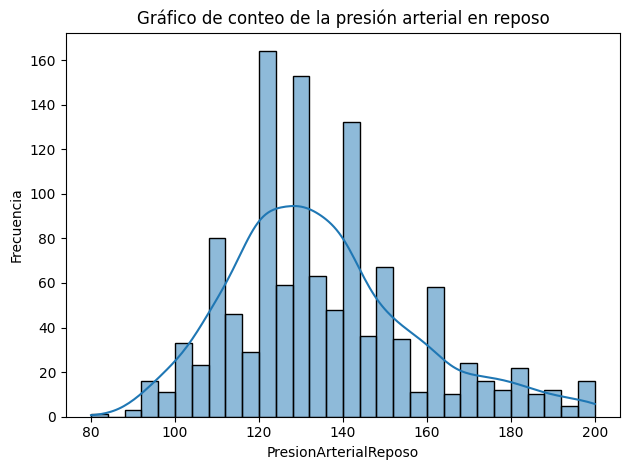

In [11]:
data['PresionArterialReposo'].value_counts().sort_index()
sns.histplot(data, x='PresionArterialReposo', bins=30, kde=True)
plt.ylabel('Frecuencia')
plt.title("Gráfico de conteo de la presión arterial en reposo");
plt.tight_layout()
plt.show()

El gráfico de conteo de la presión arterial en reposo muestra la distribución de esta variable en el conjunto de datos. Se observa una distribución aproximadamente normal con la mayor concentración de valores entre 120 y 140 mmHg. El pico máximo se encuentra alrededor de 120 mmHg, seguido de cerca por 130 mmHg.

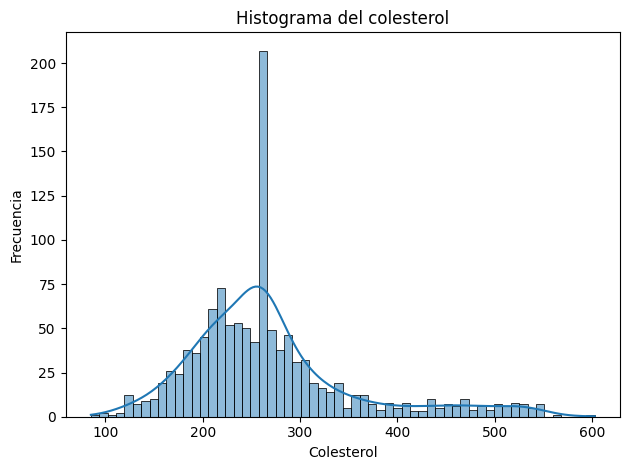

In [12]:
data['Colesterol'].value_counts().sort_index()
plt.ylabel('Frecuencia')
sns.histplot(data, x='Colesterol', bins=60, kde=True)
plt.title("Histograma del colesterol");
plt.tight_layout()
plt.show()

El histograma del colesterol muestra una distribución con un pico notable en 260-289 mg/dL, resultado de la imputación de datos faltantes. La mayoría de los valores se concentran entre 150 y 350 mg/dL, con un pico principal en 200-250 mg/dL, donde se ajusta una curva normal. El pico central refleja la imputación de medias de colesterol por edad y género (289 mg/dL para mujeres, 260 mg/dL para hombres).

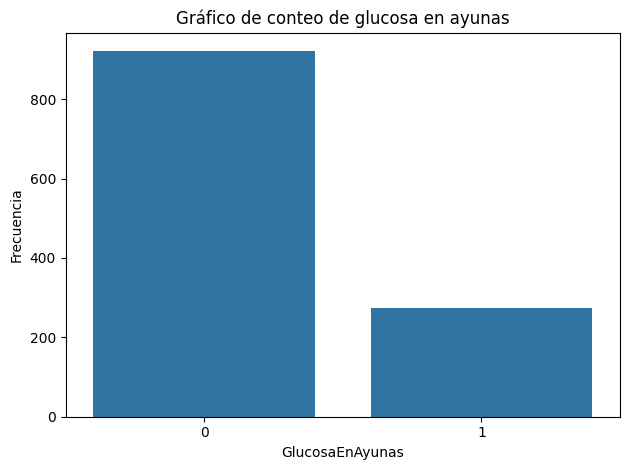

In [13]:
sns.countplot(data, x='GlucosaEnAyunas')
plt.ylabel('Frecuencia')
plt.title("Gráfico de conteo de glucosa en ayunas");
plt.tight_layout()
plt.show()

El gráfico muestra la frecuencia de dos categorías de glucosa en ayunas (FastingBS). La categoría 0, que representa niveles de glucosa en ayunas iguales o inferiores a 120 mg/dL, tiene una frecuencia mucho mayor, superando los 800 conteos. La categoría 1, que indica niveles de glucosa en ayunas superiores a 120 mg/dL, tiene una frecuencia significativamente menor, alrededor de 270 conteos. Esto sugiere que la mayoría de los individuos en el conjunto de datos presentan niveles de glucosa en ayunas dentro del rango considerado normal o bajo, mientras que una minoría presenta niveles elevados, indicativos de posible hiperglucemia.

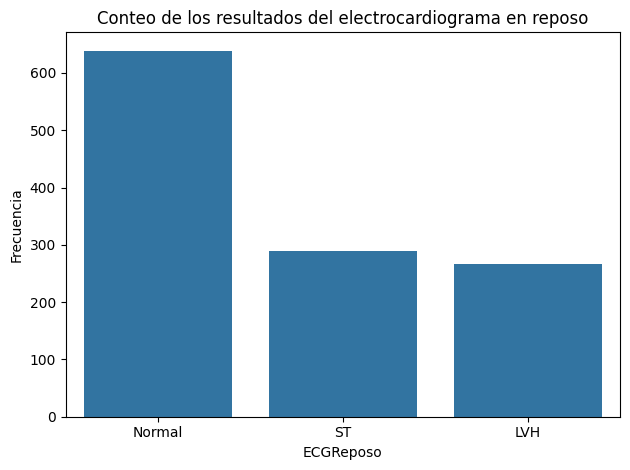

In [14]:
data['ECGReposo'].value_counts()
sns.countplot(data, x='ECGReposo')
plt.ylabel('Frecuencia')
plt.title("Conteo de los resultados del electrocardiograma en reposo");
plt.tight_layout()
plt.show()

Este gráfico muestra los resultados de electrocardiogramas. La mayoría de las personas tienen resultados normales. Un número menor muestra dos tipos de anomalías: ST y LVH.

En resumen:
* ST indica problemas con la recuperación del corazón.
* LVH indica que el corazón está agrandado.

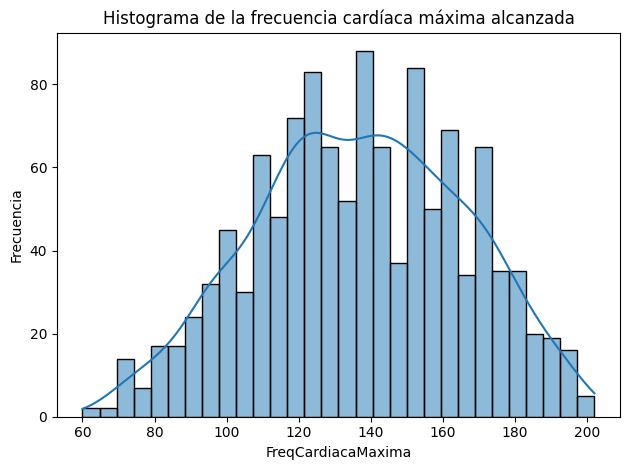

In [15]:
data['FreqCardiacaMaxima'].value_counts().sort_index()
sns.histplot(data, x='FreqCardiacaMaxima', bins=30, kde=True)
plt.ylabel('Frecuencia')
plt.title("Histograma de la frecuencia cardíaca máxima alcanzada");
plt.tight_layout()
plt.show()

Este histograma muestra cómo se distribuyen las frecuencias cardíacas máximas. La mayoría de los individuos tienen frecuencias cardíacas máximas alrededor de 140 latidos por minuto, formando una distribución en forma de campana. Menos personas tienen frecuencias cardíacas muy bajas o muy altas.

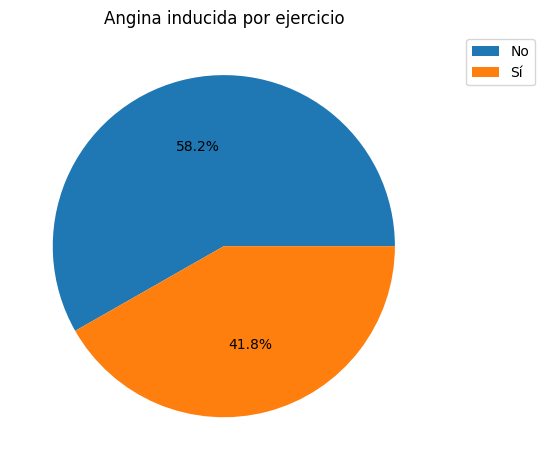

In [16]:
piechart = data['AnginaDeEsfuerzo'].value_counts()
plt.pie(piechart.values, autopct='%1.1f%%');
plt.legend(labels=['No', 'Sí'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Angina inducida por ejercicio");
plt.tight_layout()
plt.show()

Este gráfico circular muestra la proporción de personas que experimentan angina (dolor en el pecho) durante el ejercicio. El 58.2% de las personas no experimentan angina, mientras que el 41.8% sí la experimentan.

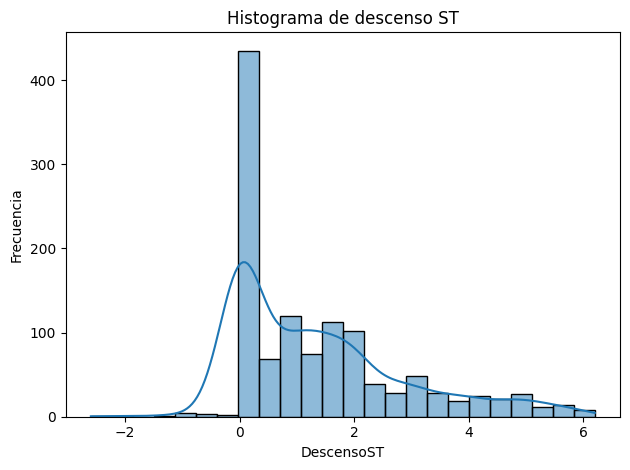

In [17]:
data['DescensoST'].value_counts().sort_index()
sns.histplot(data, x='DescensoST', kde=True)
plt.ylabel('Frecuencia')
plt.title("Histograma de descenso ST");
plt.tight_layout()
plt.show()

Este gráfico muestra la distribución de los valores de descenso ST, medidos en milímetros, en un electrocardiograma. El descenso ST es una medida de la depresión del segmento ST en el ECG. La mayoría de los individuos tienen valores de descenso ST cercanos a 0, lo que se refleja en el pico alto en esa área. A medida que los valores de descenso ST aumentan o disminuyen, la frecuencia de individuos disminuye.

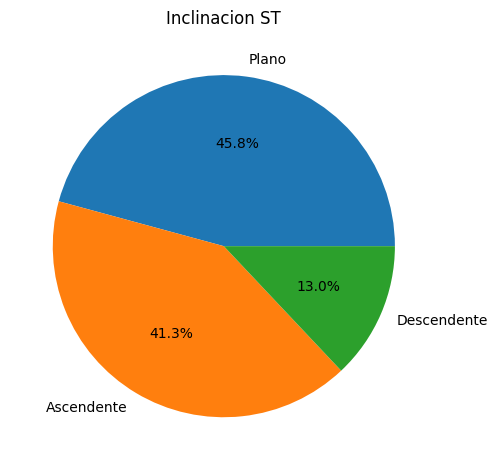

In [18]:
piechart = data['PendienteST'].value_counts()
plt.pie(piechart.values, labels=['Plano','Ascendente','Descendente'], autopct='%1.1f%%');
plt.title("Inclinacion ST");
plt.tight_layout()
plt.show()

Este gráfico muestra los diferentes tipos de inclinación del segmento ST en un electrocardiograma. La mayoría de los individuos tienen una inclinación plana (45.8%), seguida de una inclinación ascendente (41.3%). Solo un pequeño porcentaje (13.0%) tiene una inclinación descendente.

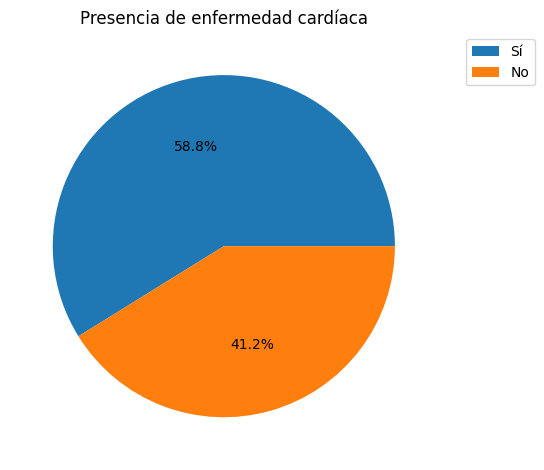

In [19]:
piechart = data['EnfermedadCardiaca'].value_counts()
plt.pie(piechart.values, autopct='%1.1f%%')
plt.legend(labels=['Sí', 'No'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Presencia de enfermedad cardíaca");
plt.tight_layout()
plt.show()

Este gráfico muestra la distribución de la presencia de enfermedad cardíaca en nuestro conjunto de datos. Vemos que el 58.8% de los individuos sí tienen enfermedad cardíaca, mientras que el 41.2% no la tienen.

# Análisis bivariado

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14048\1053004106.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(['No', 'Sí'])
C:\Users\Felipe\AppData\Local\Temp\ipykernel_14048\1053004106.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(['No', 'Sí'])
C:\Users\Felipe\AppData\Local\Temp\ipykernel_14048\1053004106.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(['No', 'Sí'])
C:\Users\Felipe\AppData\Local\Temp\ipykernel_14048\1053004106.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(['No', 'Sí'])
C:\Users\Felipe\AppData\Local\Temp\ipykernel_14048\105300410

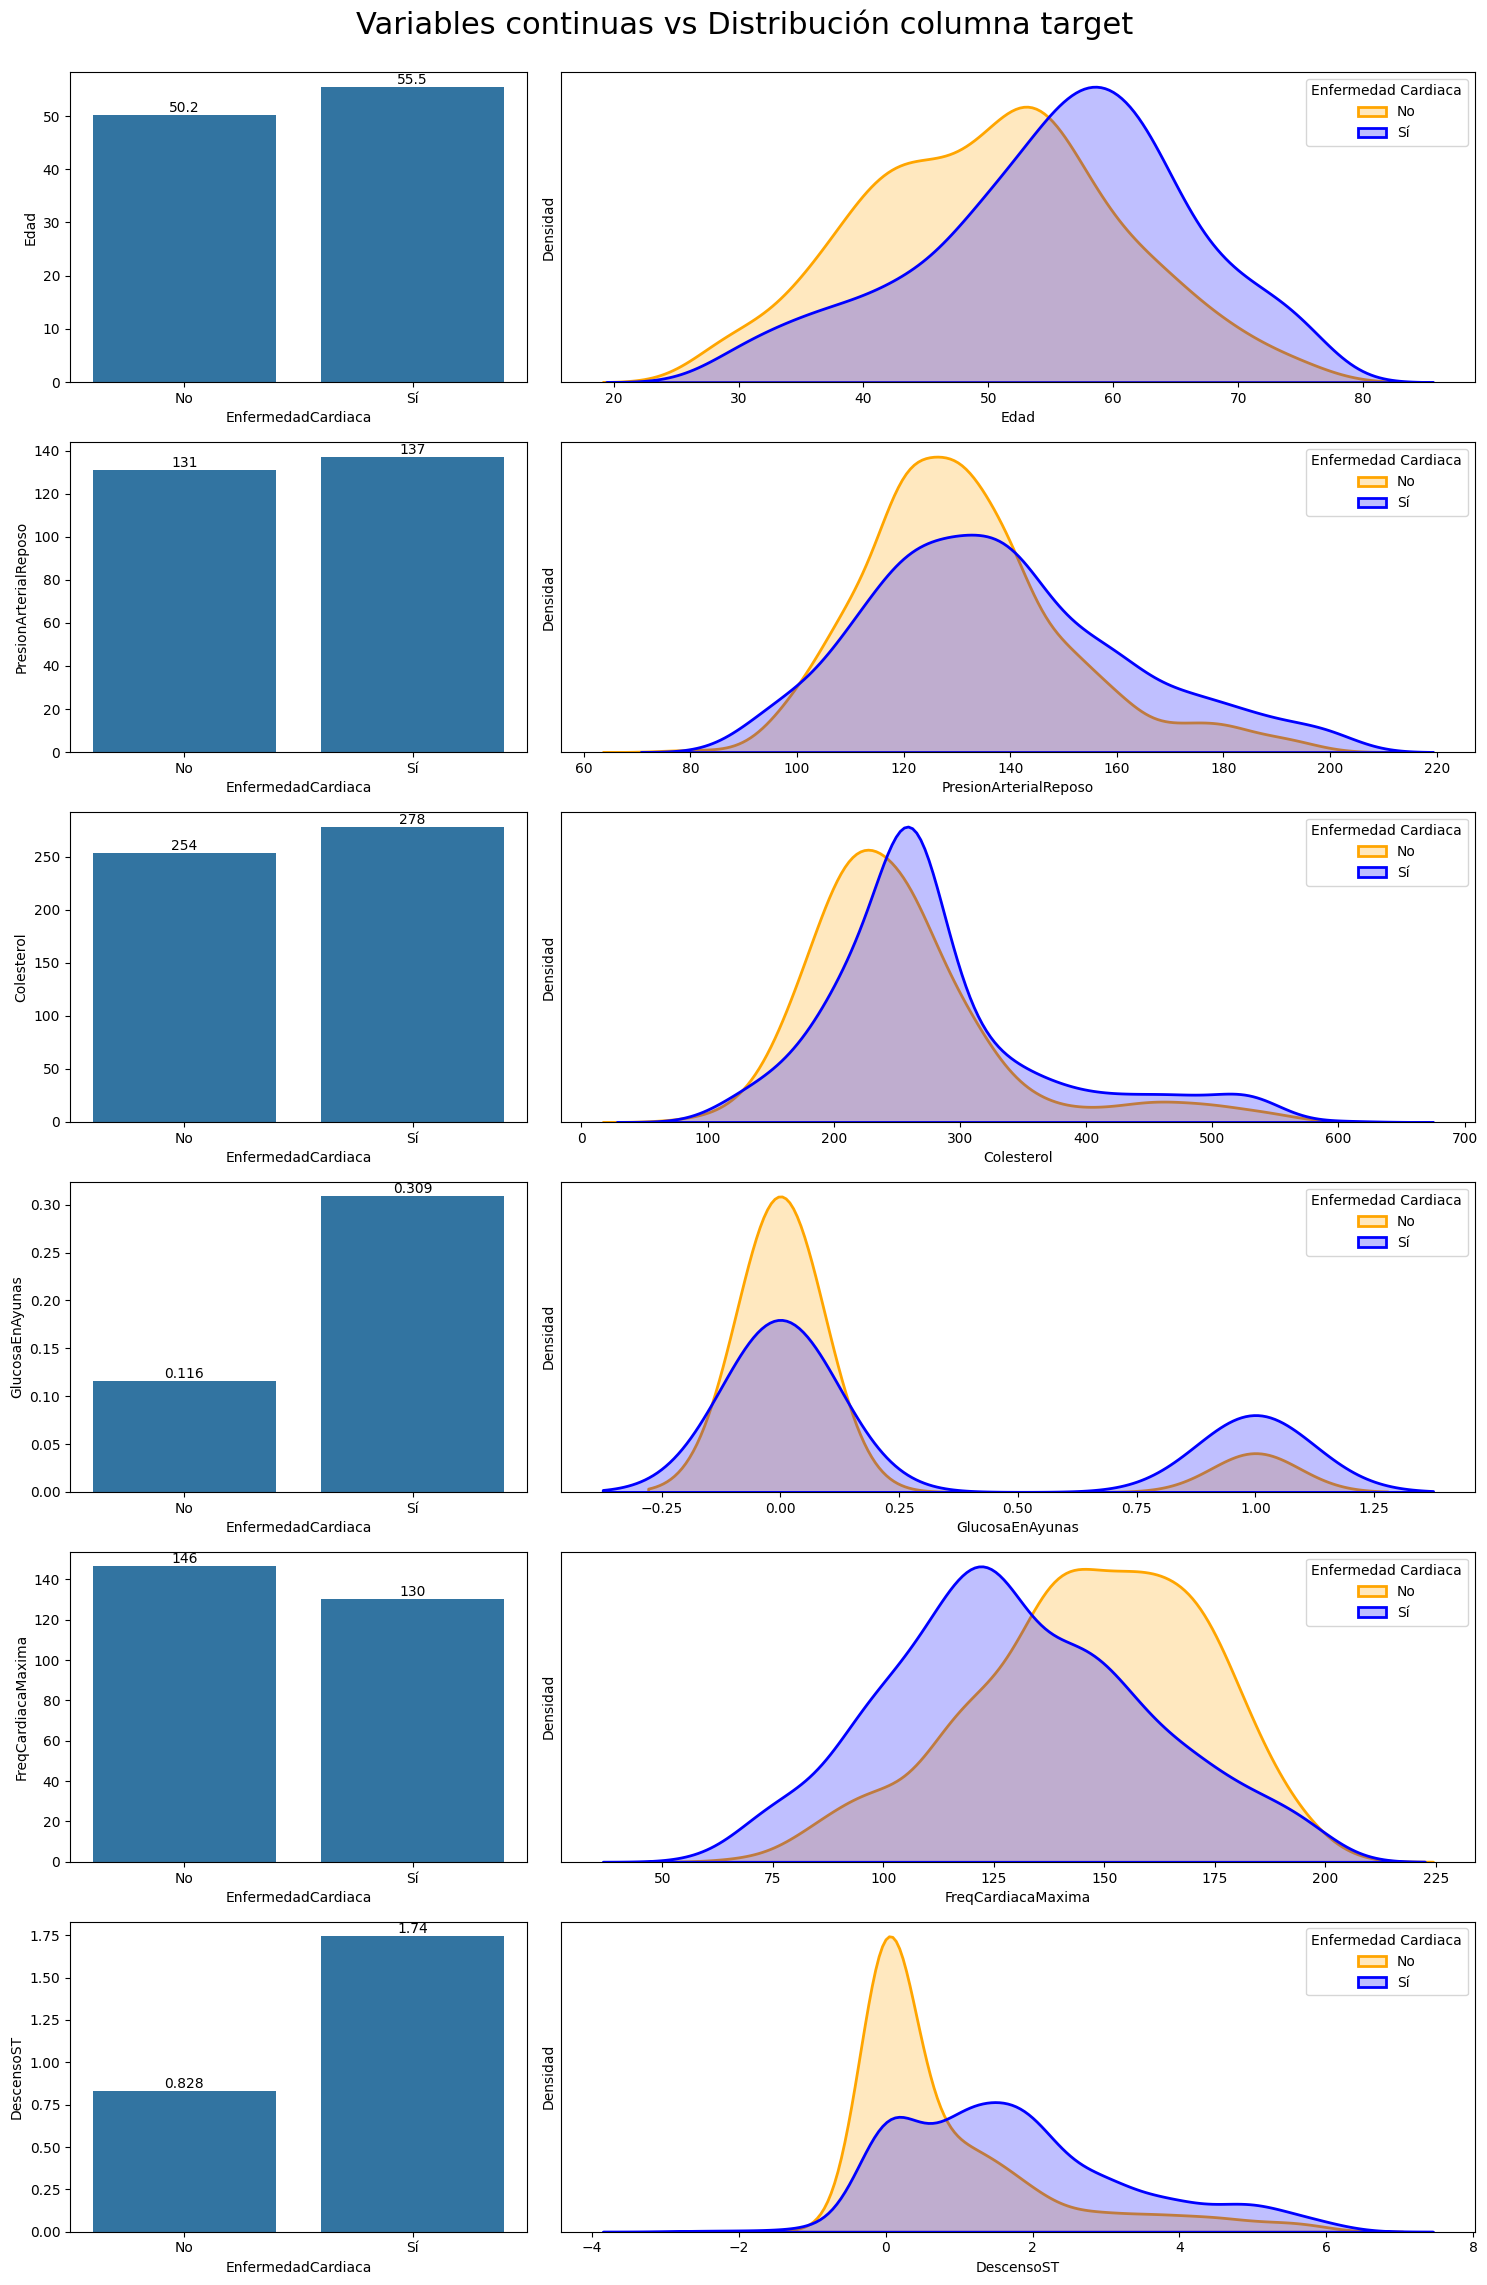

In [20]:
continuous_features = data.select_dtypes(include='number')
continuous_features = continuous_features.drop(columns='EnfermedadCardiaca')

num_features = len(continuous_features.columns)
fig, axes = plt.subplots(num_features, 2, figsize=(15, num_features * 4), gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(continuous_features.columns):

    graph = sns.barplot(data=data, x="EnfermedadCardiaca", y=col, ax=axes[i, 0], errorbar=None)
    graph.set_xticklabels(['No', 'Sí'])

    sns.kdeplot(data=data[data["EnfermedadCardiaca"] == 0], x=col, fill=True, linewidth=2, ax=axes[i, 1], label='No', color = 'orange')
    sns.kdeplot(data=data[data["EnfermedadCardiaca"] == 1], x=col, fill=True, linewidth=2, ax=axes[i, 1], label='Sí', color = 'blue')
    axes[i, 1].set_yticks([])
    axes[i, 1].legend(title='Enfermedad Cardiaca', loc='upper right')
    axes[i, 1].set_ylabel('Densidad')

    for cont in graph.containers:
        graph.bar_label(cont, fmt='%.3g')

plt.suptitle('Variables continuas vs Distribución columna target', fontsize=22)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

Edad:

* Las distribuciones muestran una ligera diferencia, con pacientes que tienen enfermedad cardíaca siendo un poco más jóvenes en promedio que aquellos sin ella. La edad media para los pacientes sin enfermedad cardíaca es ligeramente superior.
* En el gráfico de barras se ve que la cantidad de personas con enfermedad cardiaca es muy cercana a la cantidad de personas que no la tienen.

PresionArterialReposo:

* Ambas categorías muestran distribuciones superpuestas en el gráfico KDE, con valores medios casi idénticos, lo que indica un poder de diferenciación limitado para esta característica.
* En el gráfico de barras se ve que la cantidad de personas con enfermedad cardiaca es casi la misma que la cantidad de personas que no la tienen.

Colesterol:

* Las distribuciones de los niveles de colesterol para ambas categorías son bastante similares, pero el nivel medio de colesterol para los pacientes con enfermedad cardíaca es ligeramente inferior.
* En el gráfico de barras se ve que la cantidad de personas con enfermedad cardiaca es prácticamente la misma que la cantidad de personas que no la tienen.

GlucosaAyunas:

* La distribución de la glucosa en sangre en ayunas revela que una proporción ligeramente mayor de pacientes con enfermedad cardíaca tiene niveles de glucosa en ayunas superiores a 120 mg/dl. Aunque la diferencia no es muy marcada, sugiere que la glucosa en sangre en ayunas puede ser un factor de riesgo leve para la enfermedad cardíaca.
* En el gráfico de barras se ve que la cantidad de personas que no poseen la enfermedad cardiaca es muy superior a la cantidad de personas que si la poseen.

FrecCardiacaMaxima:

* Existe una diferencia notable en las distribuciones. Los pacientes con enfermedad cardíaca tienden a alcanzar una frecuencia cardíaca máxima más alta durante las pruebas de esfuerzo en comparación con aquellos sin ella.
* En el gráfico de barras se ve que la cantidad de personas que no poseen la enfermedad cardiaca es muy similar a la cantidad de personas que si la poseen.

DescensoST:

* La depresión del segmento ST inducida por el ejercicio en relación con el reposo es notablemente menor para los pacientes con enfermedad cardíaca. Su distribución alcanza su punto máximo cerca de cero, mientras que la categoría sin enfermedad tiene una dispersión más amplia.
* En el gráfico de barras se ve que la cantidad de personas que no poseen la enfermedad cardiaca es muy superior a la cantidad de personas que si la poseen.

In [21]:
categorical_features = data.drop(columns=continuous_features)

In [22]:
categorical_features = categorical_features.drop(columns='EnfermedadCardiaca')

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14048\1429635055.py:47: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  fig.legend(handles, labels=['No','Sí'], title='EnfermedadCardiaca', loc='upper center',


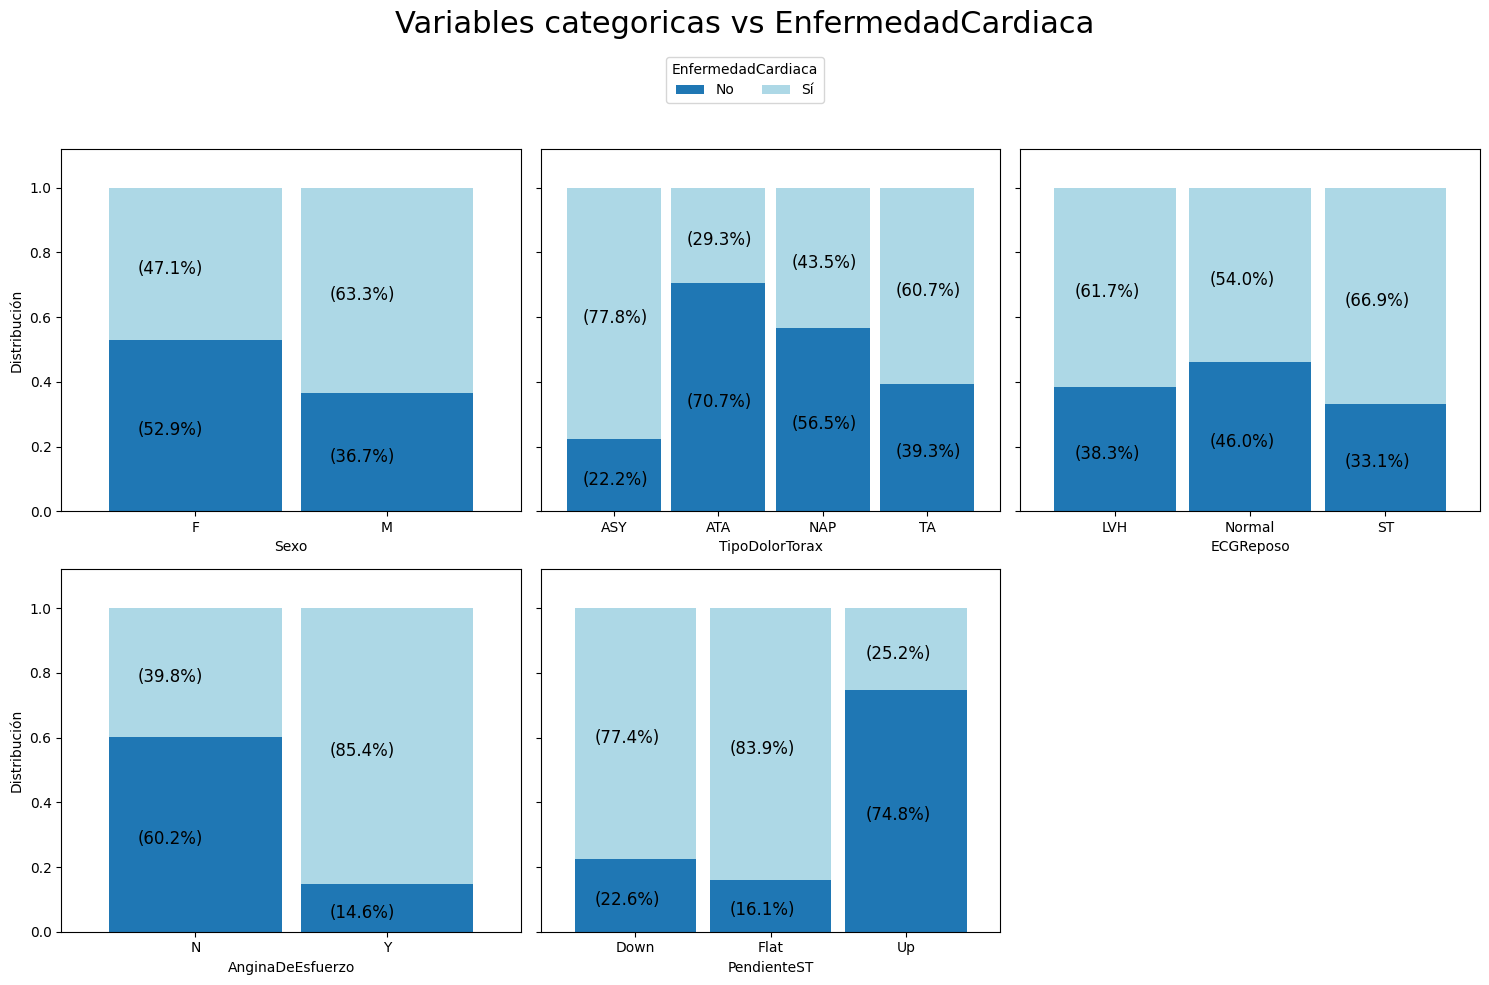

In [23]:
import matplotlib.gridspec as gridspec

num_features = len(categorical_features)

# Crear figura
fig = plt.figure(figsize=(15, 10))

# Crear un GridSpec con 2 filas y 3 columnas
gs = gridspec.GridSpec(2, 3, figure=fig)

handles, labels = None, None

# Crear subplots solo para las características que tenemos
for i, col in enumerate(categorical_features):
    # Determinar la posición en el grid
    if i < 3:
        # Primera fila: posiciones (0,0), (0,1), (0,2)
        ax = fig.add_subplot(gs[0, i])
    else:
        # Segunda fila: posiciones (1,0), (1,1)
        ax = fig.add_subplot(gs[1, i-3])
    
    cross_tab = pd.crosstab(index=data[col], columns=data['EnfermedadCardiaca'])
    cross_tab_prop = pd.crosstab(index=data[col], columns=data['EnfermedadCardiaca'], normalize='index')
    
    bar_width = 0.9
    colors = ['tab:blue', 'lightblue']
    
    plot = cross_tab_prop.plot(kind='bar', ax=ax, stacked=True, width=bar_width,
                              legend=False, ylabel='Distribución', sharey=True, color=colors)
    
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax.text(x=idx - 0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                    s=f'({np.round(proportion * 100, 1)}%)',
                    color="black", fontsize=12)
    
    if i == 0:
        handles, labels = plot.get_legend_handles_labels()
    
    ax.set_ylim([0, 1.12])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# No es necesario crear el sexto subplot (1,2) porque solo tenemos 5 características

if handles and labels:
    fig.legend(handles, labels=['No','Sí'], title='EnfermedadCardiaca', loc='upper center',
              bbox_to_anchor=(0.5, 0.94), ncol=2, fontsize=10)

plt.suptitle('Variables categoricas vs EnfermedadCardiaca', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

Sexo:

* Las mujeres (F) muestran una proporción ligeramente mayor de ausencia de enfermedad cardíaca (0) en comparación con los hombres (M). Esto sugiere que el sexo podría ser un factor relevante en la predicción de la enfermedad cardíaca.

TipoDolorTorax:

* El tipo de dolor de pecho muestra una distribución variada en relación con la enfermedad cardíaca. Los tipos ATA y TA presentan una mayor proporción de enfermedad cardíaca (1), mientras que ASY y NAP muestran una mayor proporción de ausencia de enfermedad cardíaca (0). Esto indica que el tipo de dolor de pecho puede ser un indicador importante.

ECGReposo:

* El tipo ST en el ECG en reposo muestra una notablemente mayor proporción de enfermedad cardíaca (1) en comparación con los tipos LVH y Normal. Esto sugiere que las anomalías ST en el ECG en reposo están fuertemente asociadas con la presencia de enfermedad cardíaca.

AnginaDeEsfuerzo:

* Los pacientes que no experimentaron angina inducida por el ejercicio (N) muestran una mayor proporción de ausencia de enfermedad cardíaca (0), mientras que aquellos que la experimentaron (Y) muestran una mayor proporción de enfermedad cardíaca (1). Esto indica que la angina inducida por el ejercicio es un fuerte predictor de la enfermedad cardíaca.

PendienteST:

* La pendiente plana (Flat) del segmento ST durante el ejercicio muestra una proporción considerablemente mayor de enfermedad cardíaca (1) en comparación con las pendientes ascendente (Up) y descendente (Down). Esto sugiere que la pendiente plana del segmento ST es un indicador significativo de la presencia de enfermedad cardíaca.